In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd

In [3]:
def aplot(x, y):
    plt.figure(figsize=(10, 10))
    #绘制两个自变量与y的关系
    for idx, x_i in enumerate(x):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y)
        plt.xlabel('$x_{}$'.format(idx))
        plt.ylabel('$y_{}$')
    #绘制两个自变量之间的关系
    plt.subplot(2, 2, idx+2)
    plt.scatter(x[0], x[1])
    plt.xlabel('$x_{}$'.format(idx-1))
    plt.ylabel('$x_{}$'.format(idx-2))
    

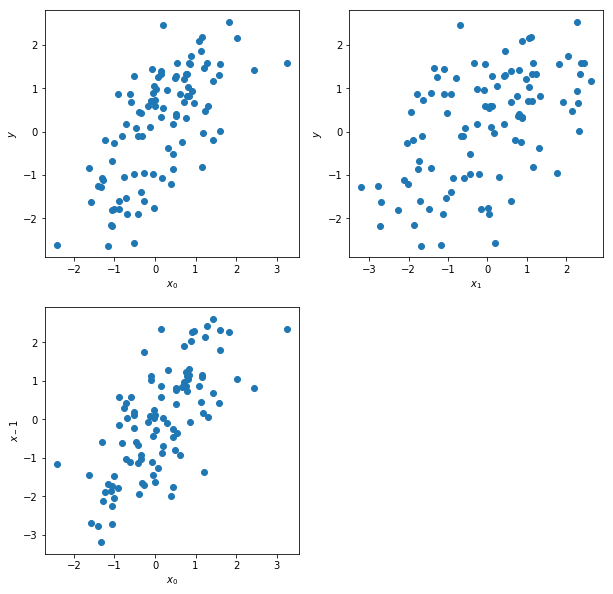

In [6]:
N = 100
x1 = np.random.normal(size=N)
x2 = x1 + np.random.normal(size=N, scale=1)
y = x1 + np.random.normal(size=N)
x = np.vstack((x1, x2))

aplot(x, y)

C:\Users\Forry\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -146.91, ||grad|| = 0.0095847: 100%|███████████████████████████████████████████| 14/14 [00:00<00:00, 786.54it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta, alpha]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 11000/11000 [00:20<00:00, 525.21draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE7DC34B38>,
      dtype=object)

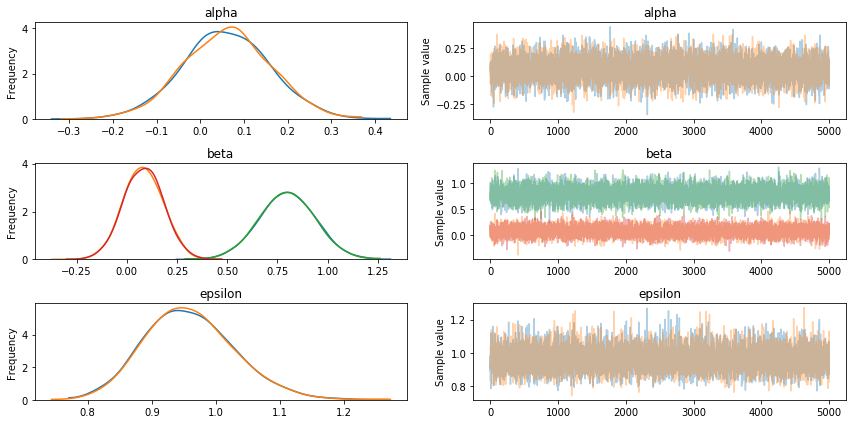

In [7]:
with pm.Model() as model1:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = alpha + pm.math.dot(beta, x)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(5000, step=step, start=start)
pm.traceplot(trace)

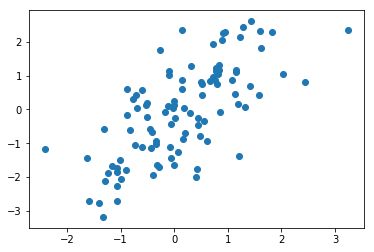

In [10]:
plt.scatter(x1, x2)